In [74]:
from keras.models import load_model
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [8]:
#model = load_model('../models/best_model.h5')

In [46]:
# specify location of time series data
file_path = '../data/interim/time_series.csv'
N_LAYERS = 25
N_NODES = 50
TEST_SIZE = 0.25
EPOCHS = 8

In [13]:
def read_data(file):
    """
    Read csv data from the specified file location.
    """
    df = pd.read_csv(file, index_col='Date')
    return df


In [19]:
def format_predictors_and_targets(df):
    
    df = df.dropna()
    
    predictors = df[['back_5', 'back_4', 'back_3', 'back_2', 'back_1']].values
    assert type(predictors) is np.ndarray
    
    n_cols = predictors.shape[1]
    
    targets = df[['Adj Close']].values
    assert type(targets) is np.ndarray
    
    return predictors, targets, n_cols


In [33]:
def build_sequential(n_nodes, n_layers, n_cols):
    
    model = Sequential()
    
    model.add(Dense(n_nodes, activation='relu', input_shape=(n_cols,)))
    
    for i in range(n_layers-1):
        model.add(Dense(n_nodes, activation='relu'))
    
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model


In [51]:
def revert_exp(predictions, y_test):
    predictions = np.exp(predictions)
    y_test_exp = np.exp(y_test)
    return predictions, y_test_exp

In [53]:
def get_accuracy(y, pred):
    
    #scale and shift binary results
    # -1 -> stock went down
    # +1 -> stock increased or stayed the same
    y = ((y>=1)*2)-1
    pred = ((pred>=1)*2)-1
    
    # stocks move in the same direction when a_i*b_i is positive
    accuracy = (np.sum((y*pred)>=0)/len(y))*100
    
    print("Predicting change in stock price with %f%s accuracy" % (accuracy,'%'))
    
    return accuracy

In [54]:
def collect_samples(num_samples=100):
    time_series_df = read_data(file_path)
    
    predictors, targets, n_cols = format_predictors_and_targets(time_series_df)
    
    X_scaler = MinMaxScaler(feature_range=(0,1))
    y_scaler = MinMaxScaler(feature_range=(0,1))
    
    predictors = X_scaler.fit_transform(predictors)
    targets = y_scaler.fit_transform(targets)
    
    model = build_sequential(N_NODES, N_LAYERS, n_cols)
    
    samples = []
    
    for i in range(num_samples):
        
        X_train, X_test, y_train, y_test = train_test_split(predictors, targets, test_size=TEST_SIZE)

        model.fit(X_train, y_train, use_multiprocessing=True, epochs=EPOCHS)
        predictions = model.predict(X_test)

        predictions = y_scaler.inverse_transform(predictions)
        y_test = y_scaler.inverse_transform(y_test)

        predictions, y_test_exp = revert_exp(predictions, y_test)

        accuracy = get_accuracy(y_test_exp, predictions)
        
        samples.append(accuracy)
        
    return samples

In [55]:
accuracy_samples = collect_samples(20)

Epoch 1/8
10994/10994 [==============================] - 3s 242us/step - loss: 0.0165
Epoch 2/8
10994/10994 [==============================] - 2s 160us/step - loss: 0.0011
Epoch 3/8
10994/10994 [==============================] - 2s 155us/step - loss: 0.0011
Epoch 4/8
10994/10994 [==============================] - 2s 154us/step - loss: 0.0012
Epoch 5/8
10994/10994 [==============================] - 2s 150us/step - loss: 0.0011
Epoch 6/8
10994/10994 [==============================] - 2s 156us/step - loss: 0.0012
Epoch 7/8
10994/10994 [==============================] - 2s 157us/step - loss: 0.0011
Epoch 8/8
10994/10994 [==============================] - 2s 152us/step - loss: 0.0012
Predicting change in stock price with 46.275580% accuracy
Epoch 1/8
10994/10994 [==============================] - 2s 155us/step - loss: 0.0011
Epoch 2/8
10994/10994 [==============================] - 2s 157us/step - loss: 0.0011
Epoch 3/8
10994/10994 [==============================] - 2s 158us/step - loss: 0.0

10994/10994 [==============================] - 2s 165us/step - loss: 0.0011
Epoch 2/8
10994/10994 [==============================] - 2s 159us/step - loss: 0.0011
Epoch 3/8
10994/10994 [==============================] - 2s 164us/step - loss: 0.0011
Epoch 4/8
10994/10994 [==============================] - 2s 162us/step - loss: 0.0011
Epoch 5/8
10994/10994 [==============================] - 2s 166us/step - loss: 0.0011
Epoch 6/8
10994/10994 [==============================] - 2s 162us/step - loss: 0.0011
Epoch 7/8
10994/10994 [==============================] - 2s 160us/step - loss: 0.0011
Epoch 8/8
10994/10994 [==============================] - 2s 163us/step - loss: 0.0011
Predicting change in stock price with 44.338336% accuracy
Epoch 1/8
10994/10994 [==============================] - 2s 160us/step - loss: 0.0010
Epoch 2/8
10994/10994 [==============================] - 2s 162us/step - loss: 0.0011
Epoch 3/8
10994/10994 [==============================] - 2s 161us/step - loss: 0.0011
Epoch 

[46.27557980900409,
 46.54843110504775,
 45.64802182810369,
 47.09413369713506,
 54.679399727148706,
 55.41609822646657,
 54.624829467939975,
 54.46111869031378,
 54.570259208731244,
 45.48431105047749,
 55.06139154160983,
 44.33833560709413,
 55.25238744884038,
 54.7612551159618,
 54.43383356070941,
 54.89768076398362,
 55.279672578444746,
 44.529331514324696,
 55.38881309686221,
 45.51159618008185]

In [75]:
accuracy_samples = [46.27557980900409,
 46.54843110504775,
 45.64802182810369,
 47.09413369713506,
 54.679399727148706,
 55.41609822646657,
 54.624829467939975,
 54.46111869031378,
 54.570259208731244,
 45.48431105047749,
 55.06139154160983,
 44.33833560709413,
 55.25238744884038,
 54.7612551159618,
 54.43383356070941,
 54.89768076398362,
 55.279672578444746,
 44.529331514324696,
 55.38881309686221,
 45.51159618008185]

In [76]:
def percentile_p(arr, p):
    """return a tuple of the lower and upper bounds of a p_% confindence interval"""
    ends = 100 - p
    left = ends/2
    right = 100 - left
    return np.percentile(arr, [left, right])

In [77]:
def bootstrap_replicate_1d(data, func):
    """Draw a single bootstrap replicate"""
    return func(np.random.choice(data, size=len(data)))

In [78]:
def draw_bs_reps(data, func, size=1):
    """Draw many bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [79]:
def bootstrap_mean(samples):
    
    """ given a sample, use Bootstrap Statistics to return the distribution and the 95 % confidence interval for the mean as a tuple"""
    # compute observed mean of sample
    observed_mean = np.mean(samples)
    
    # generate 10,000 bootstrap replicates
    N_reps = 10000
    bs_replicates = draw_bs_reps(samples, np.mean, N_reps)
    
    # compute standard error of the mean 
    sem = np.std(samples) / np.sqrt(len(samples))
    
    # compute extremes of 95 percentile
    int_min, int_max = percentile_p(bs_replicates, 95)
    
    conf_min, conf_max = percentile_p(bs_replicates, 95)
    conf_range = bs_replicates[(bs_replicates >= conf_min) & (bs_replicates <= conf_max)]
    
    
    # plot distribution of bootstrap replicates
    _ , bins, _ = plt.hist(bs_replicates, bins=50, density=True, alpha=0.5)
    _ = plt.hist(conf_range, bins=bins, density=True, alpha=1, color='b')
    _ = plt.xlabel('mean')
    _ = plt.ylabel('PDF')


    _ = plt.axvline(conf_min, color='w', linestyle='-', linewidth=2.5)
    _ = plt.axvline(conf_max, color='w', linestyle='-', linewidth=2.5)
    _ = plt.axvline(np.mean(bs_replicates), color='w', linestyle=':')
    _ = plt.axvline(observed_mean, color='r', alpha=0.5, linestyle=':')

    _ = plt.title('95% Confidence Interval of the Mean')
    print(np.mean(bs_replicates).round(3), observed_mean.round(3))
    plt.show()
    
    return (bs_replicates, int_min, int_max)

51.238 51.213


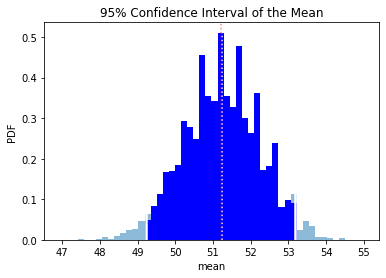

In [80]:
bootstrapping = bootstrap_mean(accuracy_samples)

In [82]:
replicates, int_min, int_max = bootstrapping
np.mean(replicates)

51.237540927694404